In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install xlrd==1.2.0

In [ ]:
categories = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','categories')
categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
brands =  pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','brands')
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
products =  pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','products')
products

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


# 1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria

In [ ]:
catologo = pd.merge(products,brands,how='inner',on='brand_id')
catalogo_complessivo = pd.merge(catologo,categories,how='inner',on='category_id')[['product_name','brand_name','category_name']]
catalogo_complessivo

,product_name,brand_name,category_name
0,Trek 820 - 2016,Trek,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Trek,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Trek,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Trek,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Trek,Mountain Bikes
...,...,...,...
316,Sun Bicycles Cruz 7 - 2017,Sun Bicycles,Comfort Bicycles
317,Sun Bicycles Cruz 3 - Women's - 2017,Sun Bicycles,Comfort Bicycles
318,Sun Bicycles Cruz 7 - Women's - 2017,Sun Bicycles,Comfort Bicycles
319,Sun Bicycles Drifter 7 - 2017,Sun Bicycles,Comfort Bicycles


# 2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.


In [ ]:
prod_per_cat = pd.merge(products,categories,how='inner',on='category_id')
prod_per_cat.groupby('category_name')['product_name'].count().sort_values()

category_name
Cyclocross Bicycles    10
Electric Bikes         24
Comfort Bicycles       30
Children Bicycles      59
Mountain Bikes         60
Road Bikes             60
Cruisers Bicycles      78
Name: product_name, dtype: int64

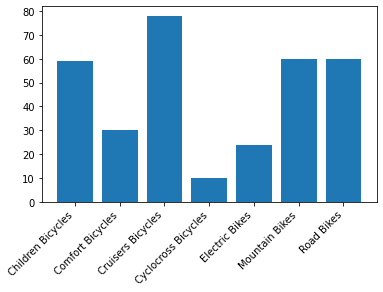

In [ ]:
# grafico
fig = plt.figure()
ax = plt.axes()
ax.bar(prod_per_cat.groupby('category_name')['product_name'].count().index,prod_per_cat.groupby('category_name')['product_name'].count().values)
fig.autofmt_xdate(rotation=45) 
plt.show()

# 3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti


In [ ]:
prod_per_brand = pd.merge(products,brands,how='inner',on='brand_id')
prod_per_brand.groupby('brand_name')['product_name'].count().sort_values()

brand_name
Ritchey           1
Heller            3
Pure Cycles       3
Strider           3
Haro             10
Sun Bicycles     23
Surly            25
Electra         118
Trek            135
Name: product_name, dtype: int64

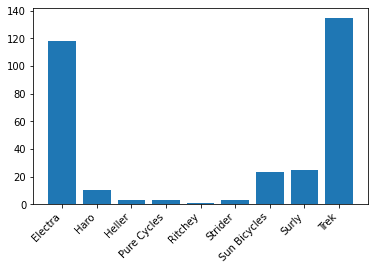

In [ ]:
#grafico
fig = plt.figure()
ax = plt.axes()
ax.bar(prod_per_brand.groupby('brand_name')['product_name'].count().index,prod_per_brand.groupby('brand_name')['product_name'].count().values)
fig.autofmt_xdate(rotation=45) 
plt.show()

#4. i nomi dei prodotti della marca Trek

In [ ]:
catalogo_complessivo[catalogo_complessivo.brand_name.str.contains('Trek')][['brand_name','product_name']]

,brand_name,product_name
0,Trek,Trek 820 - 2016
1,Trek,Trek Fuel EX 8 29 - 2016
2,Trek,Trek Slash 8 27.5 - 2016
3,Trek,Trek Remedy 29 Carbon Frameset - 2016
4,Trek,Trek X-Caliber 8 - 2017
...,...,...
172,Trek,Trek Precaliber 24 (7-Speed) - Boys - 2018
173,Trek,Trek Precaliber 24 21-speed Boy's - 2018
174,Trek,Trek Precaliber 24 21-speed Girl's - 2018
175,Trek,Trek Precaliber 24 7-speed Girl's - 2018


# 5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome


In [ ]:
catalogo_complessivo[catalogo_complessivo.category_name.str.contains('Bikes')][['product_name','category_name']]

,product_name,category_name
0,Trek 820 - 2016,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Mountain Bikes
...,...,...
139,Surly ECR - 2018,Road Bikes
140,Surly Pack Rat - 2018,Road Bikes
141,Surly Straggler 650b - 2018,Road Bikes
142,Surly ECR Frameset - 2018,Road Bikes


# 6. la categoria che ha il prodotto che costa di più


In [ ]:
prod_per_cat = pd.merge(products,categories,how='inner',on='category_id')

In [ ]:
prod_per_cat[prod_per_cat.list_price == prod_per_cat.list_price.max()]['category_name']


285    Road Bikes
Name: category_name, dtype: object

# 7. i brand con almeno 100 prodotti. Visualizzare il nome del brand e il numero di prodotti


In [ ]:
prod_per_brand[prod_per_brand >= 100]

brand_name
Electra    118
Trek       135
Name: product_name, dtype: int64

In [ ]:
prod_per_brand = prod_per_brand.groupby('brand_name')['product_name'].count() 
prod_maggiori_100 = prod_per_brand[prod_per_brand >100]

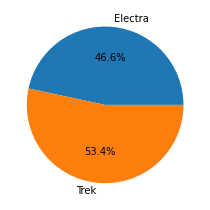

In [ ]:
#grafico
fig = plt.figure()
ax = plt.axes()
ax.pie(prod_maggiori_100.values,labels = prod_maggiori_100.index,autopct='%1.1f%%')
fig.autofmt_xdate(rotation=45) 
plt.show()

#8. la marca del prodotto 'Electra Townie Original 21D - 2016'


In [ ]:
prod_per_brand = pd.merge(products,brands,how='inner',on='brand_id')
prod_per_brand

,product_id,product_name,brand_id,category_id,model_year,list_price,brand_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Trek
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Trek
2,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99,Trek
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99,Trek
4,9,Trek Conduit+ - 2016,9,5,NaN,2999.99,Trek
...,...,...,...,...,...,...,...
316,93,Haro Shredder 20 Girls - 2017,2,1,2017.0,209.99,Haro
317,94,Haro Shredder Pro 20 - 2017,2,1,2017.0,249.99,Haro
318,263,Strider Classic 12 Balance Bike - 2018,6,1,2018.0,89.99,Strider
319,264,Strider Sport 16 - 2018,6,1,2018.0,249.99,Strider


In [ ]:
prod_per_brand[prod_per_brand.product_name == 'Electra Townie Original 21D - 2016']['brand_name']

164    Electra
173    Electra
Name: brand_name, dtype: object

# 9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti


In [ ]:
prod_per_anno = products.groupby('model_year')['product_name'].count()
prod_per_anno

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_name, dtype: int64

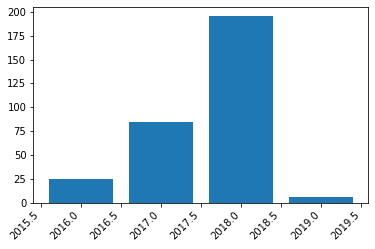

In [ ]:
#grafico
fig = plt.figure()
ax = plt.axes()
ax.bar(prod_per_anno.index,prod_per_anno.values)
fig.autofmt_xdate(rotation=45) 
plt.show()